### CAR PRICE PREDICTION WITH MACHINE LEARNING

The price of a car depends on a lot of factors like the goodwill of the brand of the car, features of the car, horsepower and the mileage it gives and many more. Car price prediction is one of the major research areas in machine learning. So if you want to learn how to train a car price prediction model then this project is for you.

## Importing Libraries

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


## Importing Dataset

In [162]:
df=pd.read_csv(r"C:\Users\Akshata Potdar\Downloads\CarPrice_Assignment.csv.xls")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [99]:
df.shape

(205, 26)

### EDA 

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [101]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

### Now we draw following conclusion about our dataset.
- Our dataset total 26 feature. Among them 25 are independent and 1(price) is dependent feature
- Our dataset contains 205 rows
- contains both categorical and numerical feature
- Dataset has no missing values

In [102]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [103]:
df.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


In [104]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [105]:
df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [106]:
df.duplicated().sum()

0

In [107]:
df['CarName'].value_counts()

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64

In [108]:
df['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [109]:
df['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [110]:
df['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [111]:
df['carbody'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [112]:
df['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [113]:
df['enginelocation'].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [114]:
df['fuelsystem'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

In [115]:
df['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [116]:
df['CarBrand'] = df.CarName.apply(lambda s: s.split()[0])
df["CarBrand"].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: CarBrand, dtype: int64

## Fixing Invalid Values:

##### There seems to be some spelling error in the CompanyName column.

- toyota = toyouta
- Nissan = nissan
- maxda = mazda
- volkswagen = vokswagen = vw
- porsche = porcshce

In [117]:
brand_map = {'toyouta':'toyota',
    'Nissan':'nissan',
    'maxda':'mazda',
    'vokswagen':'volkswagen',
    'vw':'volkswagen',
    'porcshce':'porsche'}
df['CarBrand'] = df.CarBrand.apply(lambda s: brand_map[s] if s in brand_map else s)
df['CarBrand'].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: CarBrand, dtype: int64

In [118]:
df.drop('car_ID',axis=1,inplace=True)


In [119]:
df

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarBrand
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


In [120]:
df.drop('CarName',axis=1,inplace=True)
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarBrand
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


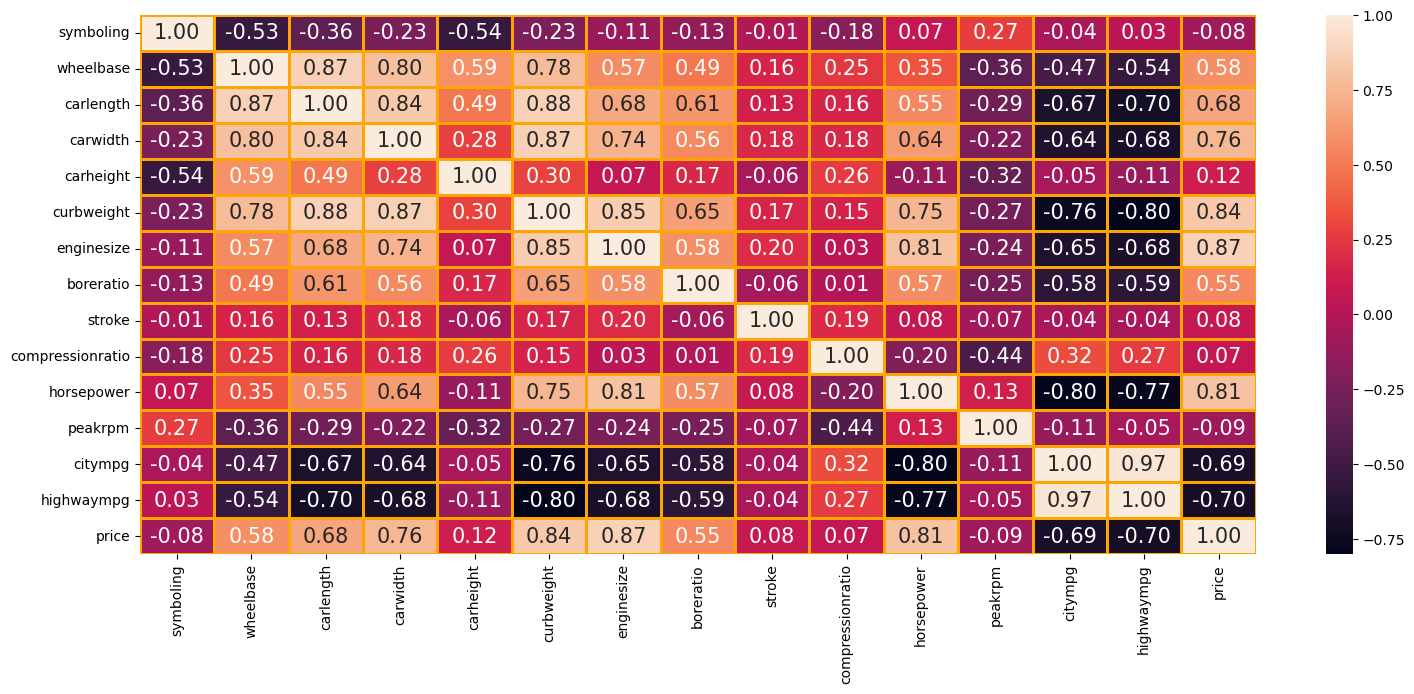

In [121]:
plt.figure(figsize=(18,7))
correlations =df.corr()
sns.heatmap(correlations, annot=True, fmt='0.2f', annot_kws={'size':15}, linewidths=2, linecolor='orange')
plt.show()
                                                             

### Correlation of numerical variables:

- wheelbase have positive correlation with price of 58%
- car length and car width have positive correlation with price of 68% and 76%
- curbweight have positive correlation with price of 84%
- enginesize have positive correlation with price of 87%
- boreratio have positive correlation with price of 55%
- horsepower have positive correlation with price of 81%
- citympg and highwaympg have negative correlation with price of 69% and 70%

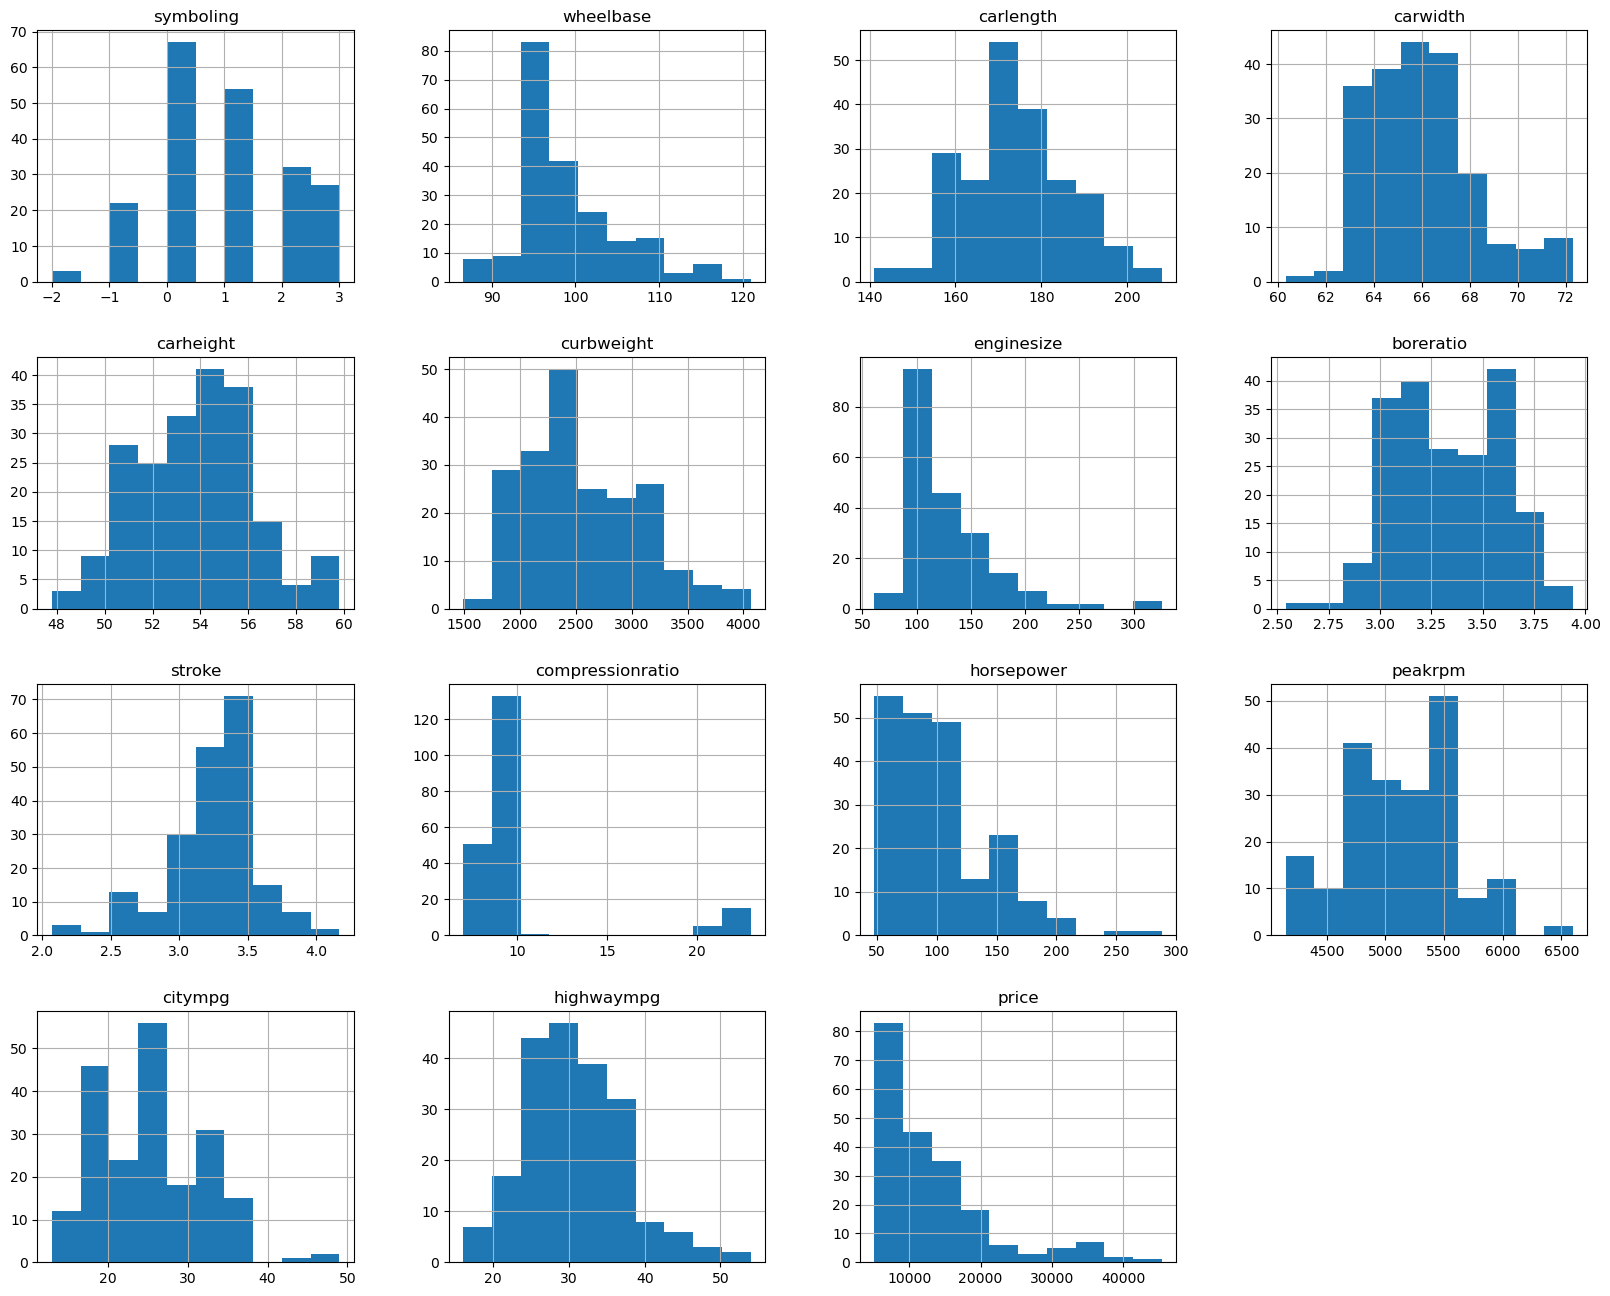

In [122]:
df.hist(figsize=(20,16));

In [123]:
# Checking Null values
df.isnull().sum()*100/df.shape[0]

symboling           0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
CarBrand            0.0
dtype: float64

In [124]:
df.price.describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

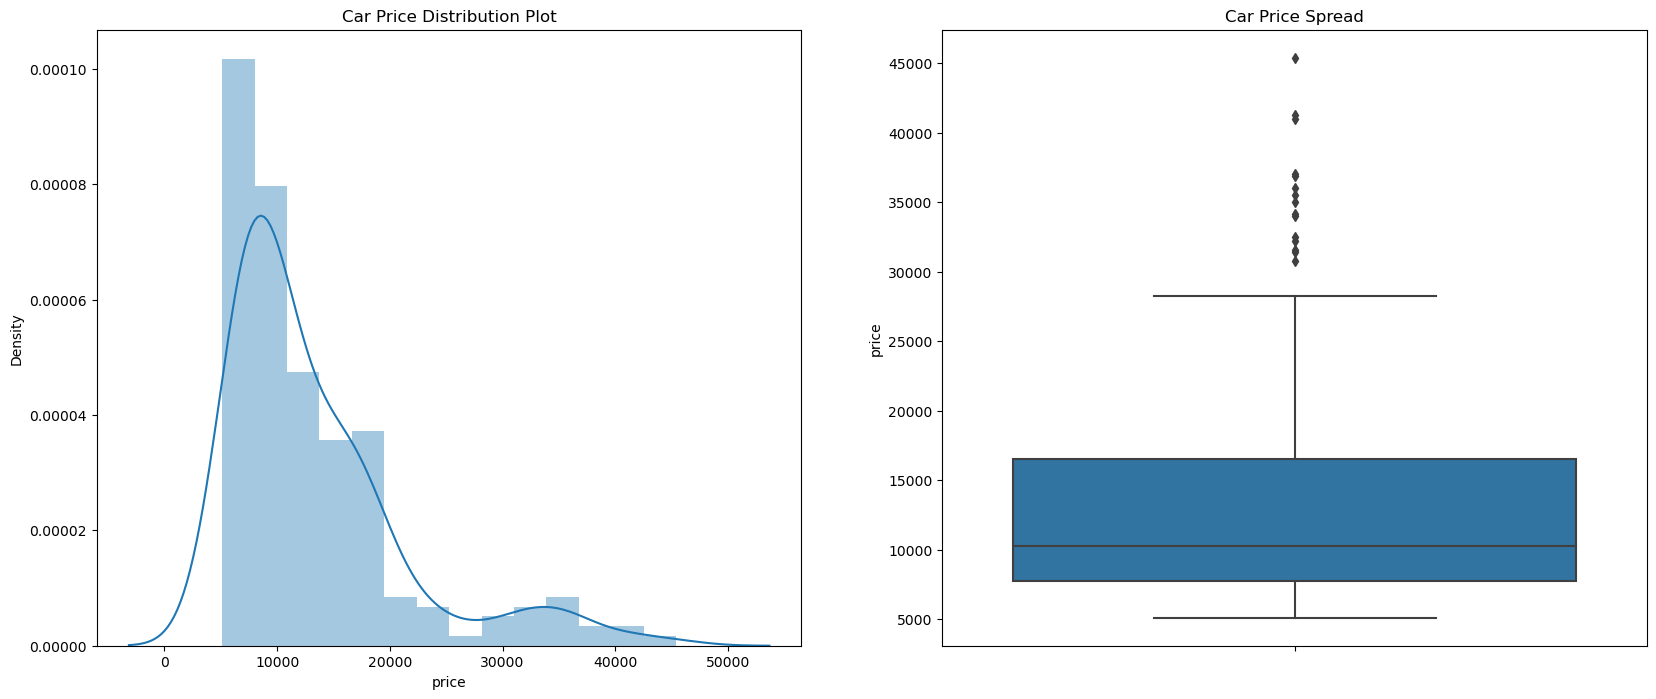

In [125]:

# Let's get some information about our target feature
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(df['price'])

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=df['price'])

plt.show()


- The plot seemed to be right-skewed, meaning that the most prices in the dataset are low (below 15000).
- There is a significant difference between the mean and the median of the price distribution.
- The data points are far spread out from the mean, which indicates a high variance in the car prices. (85% of the prices below 18,500 whereas the remaining 15% are between 18,500 and 45,400.)

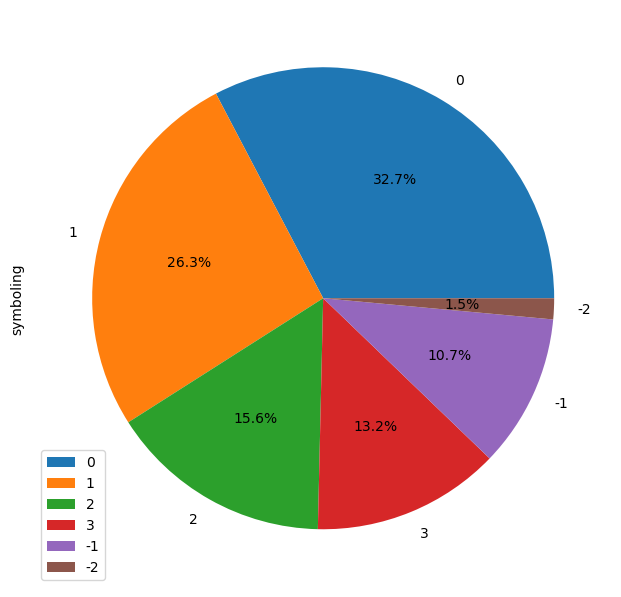

<Figure size 640x480 with 0 Axes>

In [126]:
df_sym = pd.DataFrame(df['symboling'].value_counts())
df_sym.plot.pie(subplots=True,labels = df_sym.index.values, autopct='%1.1f%%', figsize = (15,7.5))
# Unsquish the pie.
plt.gca().set_aspect('equal')
plt.show()
plt.tight_layout()

In [127]:
df[['symboling','price']].groupby("symboling").mean()

,price
symboling,
-2,15781.666667
-1,17330.681818
0,14366.965179
1,10037.907407
2,10109.281250
3,17221.296296


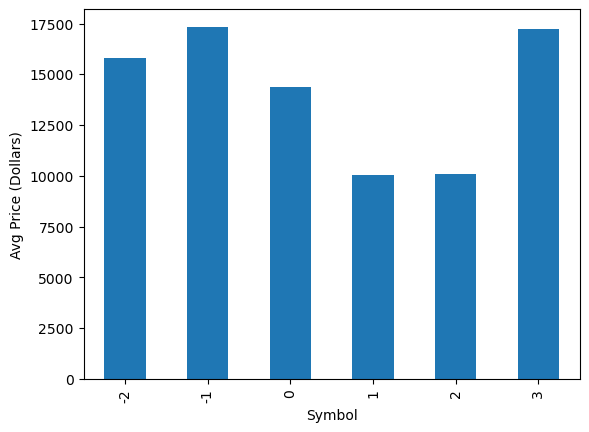

In [128]:
# Let's see average price of cars in each symbol category.
plt1 = df[['symboling','price']].groupby("symboling").mean().plot(kind='bar',legend = False,)
plt1.set_xlabel("Symbol")
plt1.set_ylabel("Avg Price (Dollars)")
#xticks(rotation = 0)
plt.show()

In [163]:
df['brand'] = df.CarName.str.split(' ').str.get(0).str.upper()

In [164]:
len(set(df.brand.values))

27

In [165]:
df['brand'] = df['brand'].replace(['VW', 'VOKSWAGEN'], 'VOLKSWAGEN')
df['brand'] = df['brand'].replace(['MAXDA'], 'MAZDA')
df['brand'] = df['brand'].replace(['PORCSHCE'], 'PORSCHE')
df['brand'] = df['brand'].replace(['TOYOUTA'], 'TOYOTA')


In [166]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,ALFA-ROMERO
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,ALFA-ROMERO
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,ALFA-ROMERO
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,AUDI
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,AUDI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,VOLVO
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,VOLVO
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,VOLVO
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,VOLVO


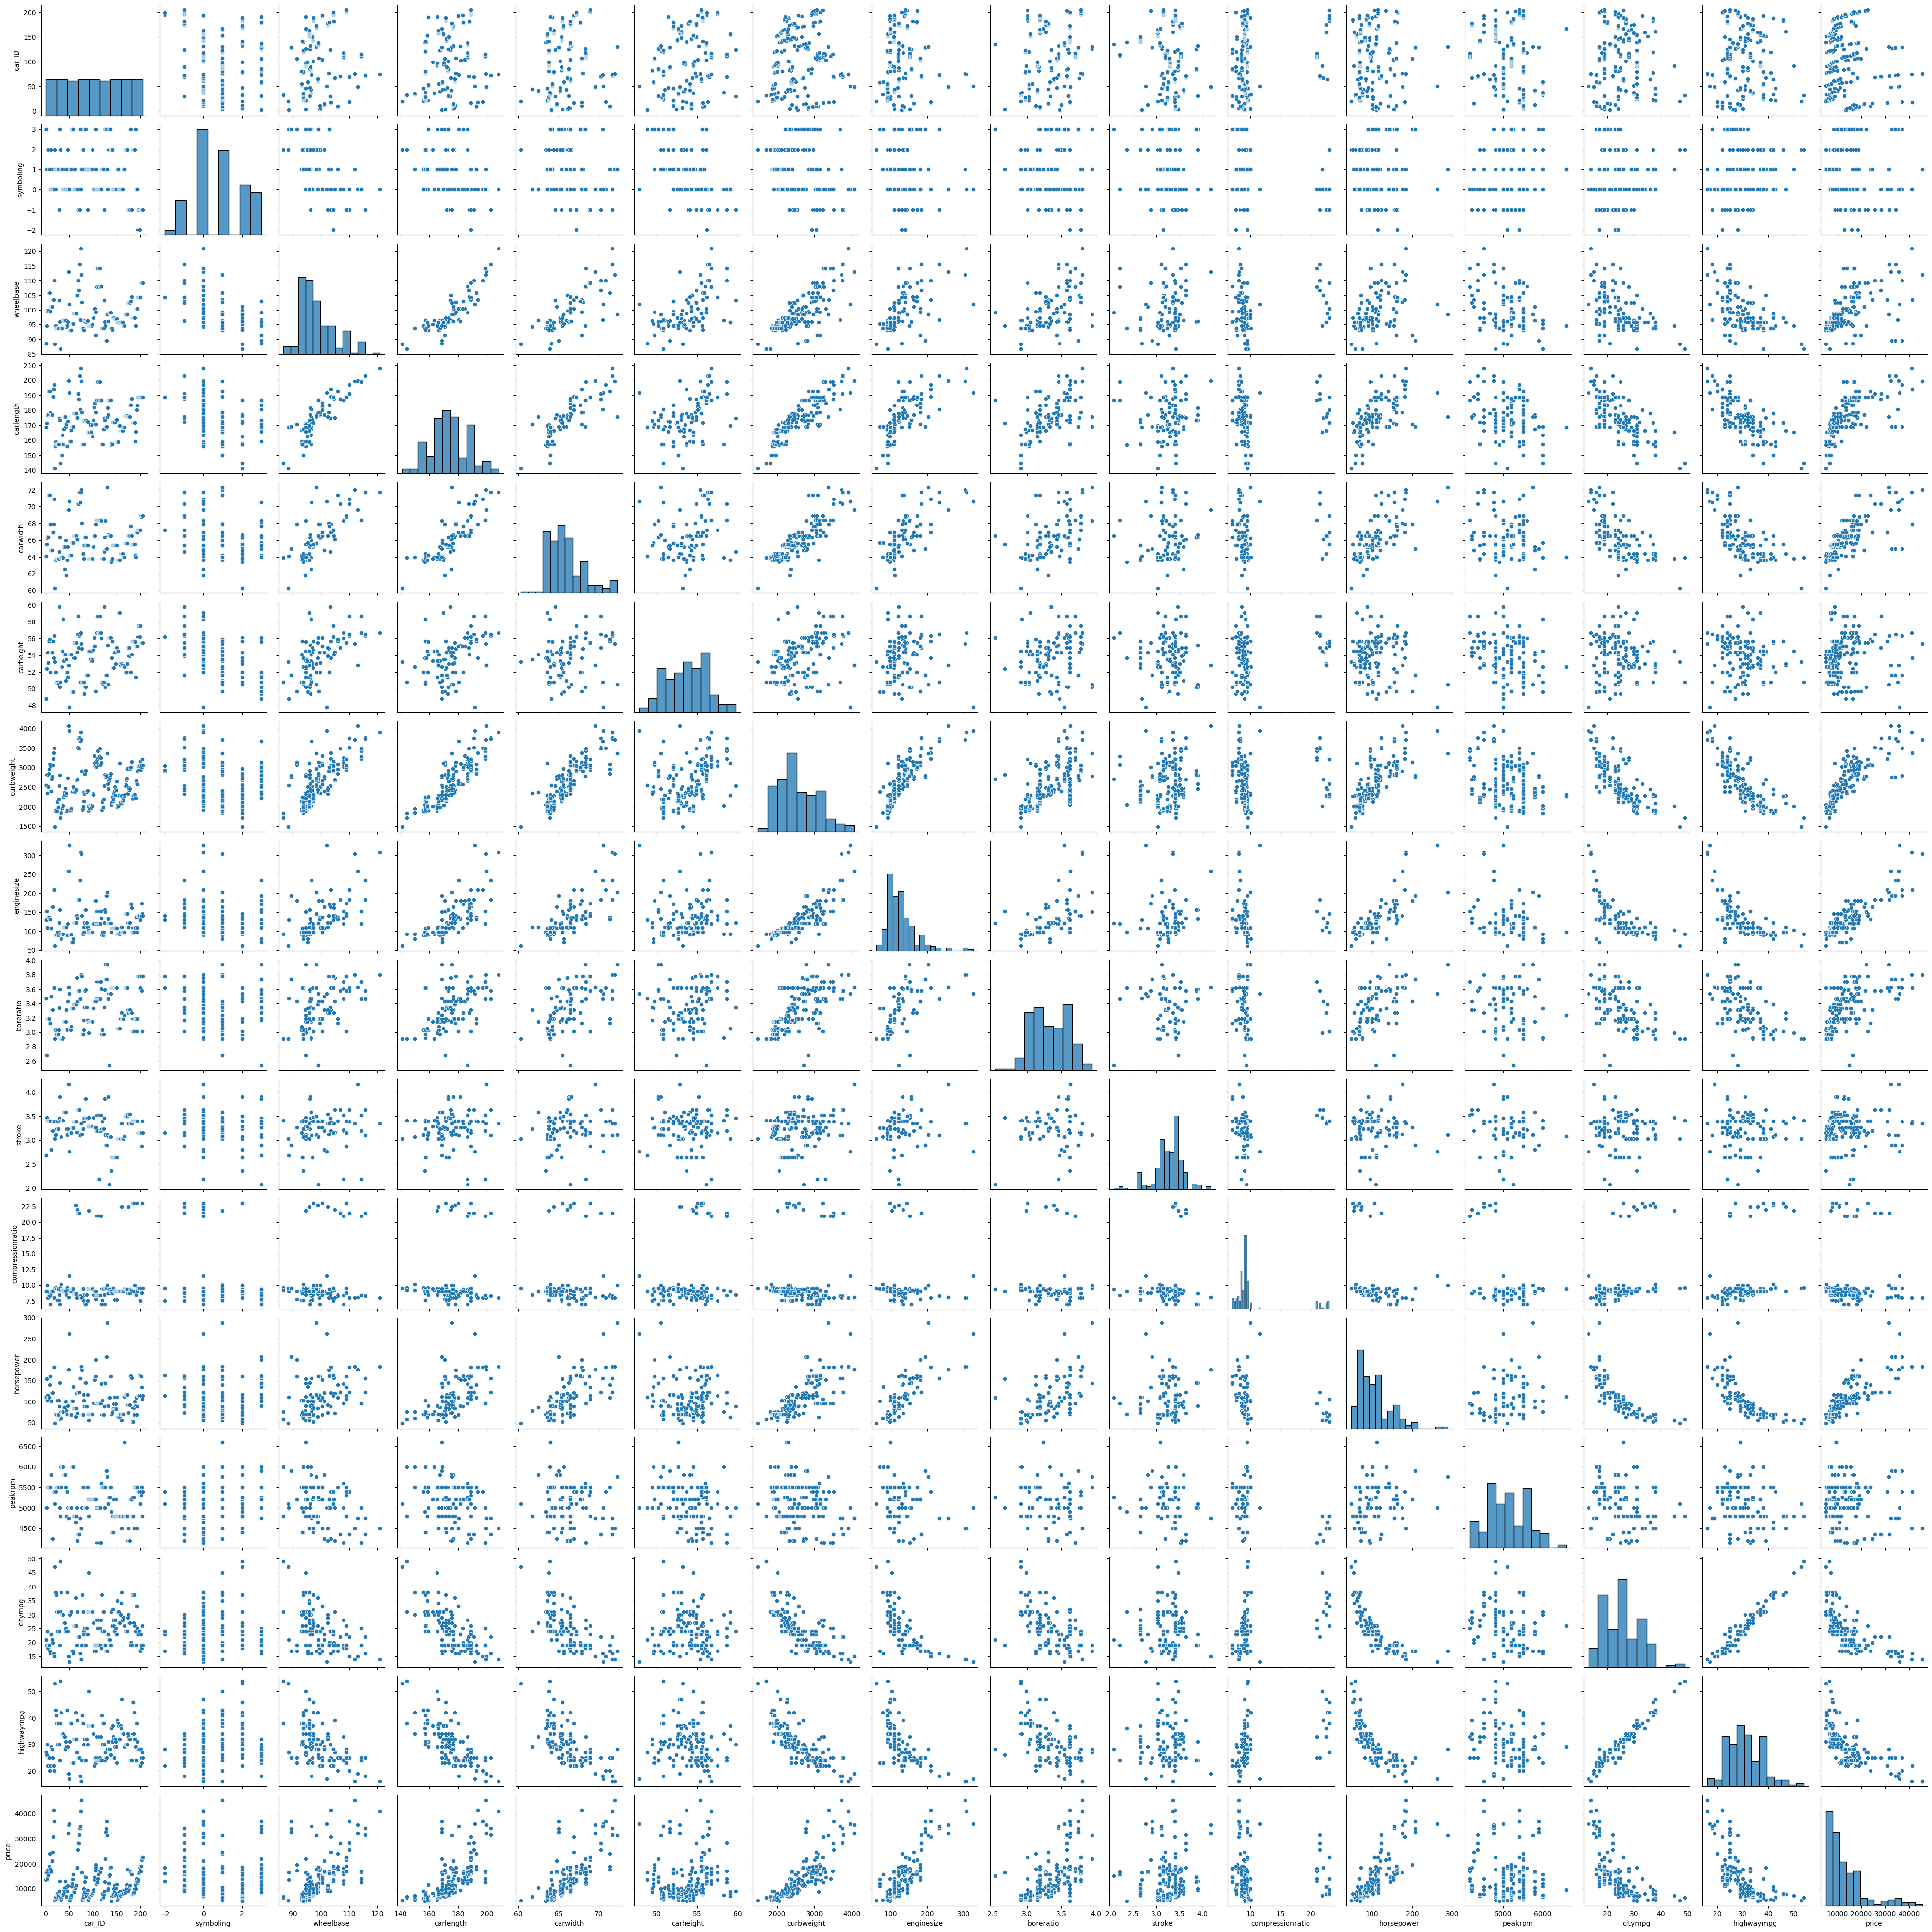

In [167]:
sns.pairplot(df)

In [168]:
df =df[['symboling','fueltype', 'aspiration','doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase','carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype','cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke','compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg','price']]

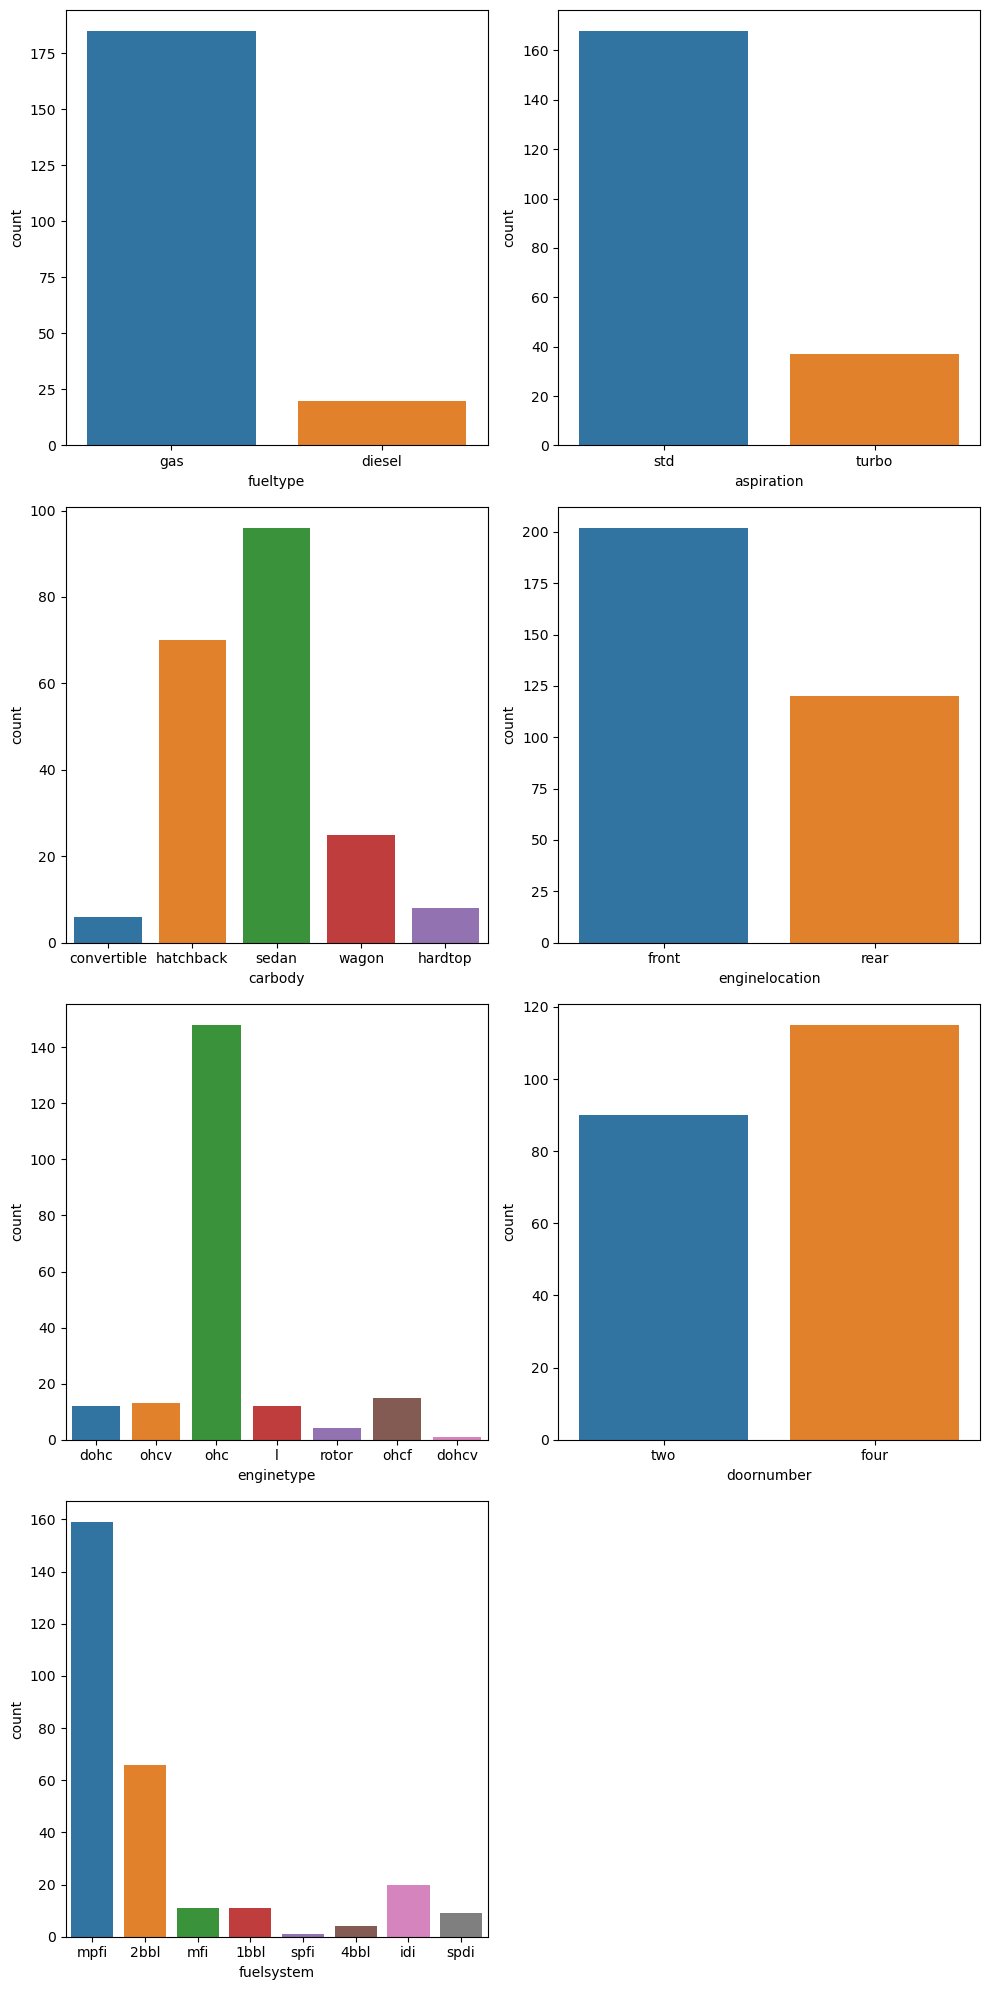

In [169]:
plt.figure(figsize=(10, 20))
plt.subplot(4,2,1)
sns.countplot(x = 'fueltype', data = auto)
plt.subplot(4,2,2)
sns.countplot(x = 'aspiration', data = auto)
plt.subplot(4,2,3)
sns.countplot(x = 'carbody',  data = auto)
plt.subplot(4,2,4)
sns.countplot(x = 'drivewheel', data = auto)
plt.subplot(4,2,4)
sns.countplot(x = 'enginelocation',data = auto)
plt.subplot(4,2,5)
sns.countplot(x = 'enginetype',  data = auto)
plt.subplot(4,2,6)
sns.countplot(x = 'doornumber',  data = auto)
plt.subplot(4,2,7)
sns.countplot(x = 'cylindernumber',  data = auto)
plt.subplot(4,2,7)
sns.countplot(x = 'fuelsystem',  data = auto)
plt.tight_layout()
plt.show()


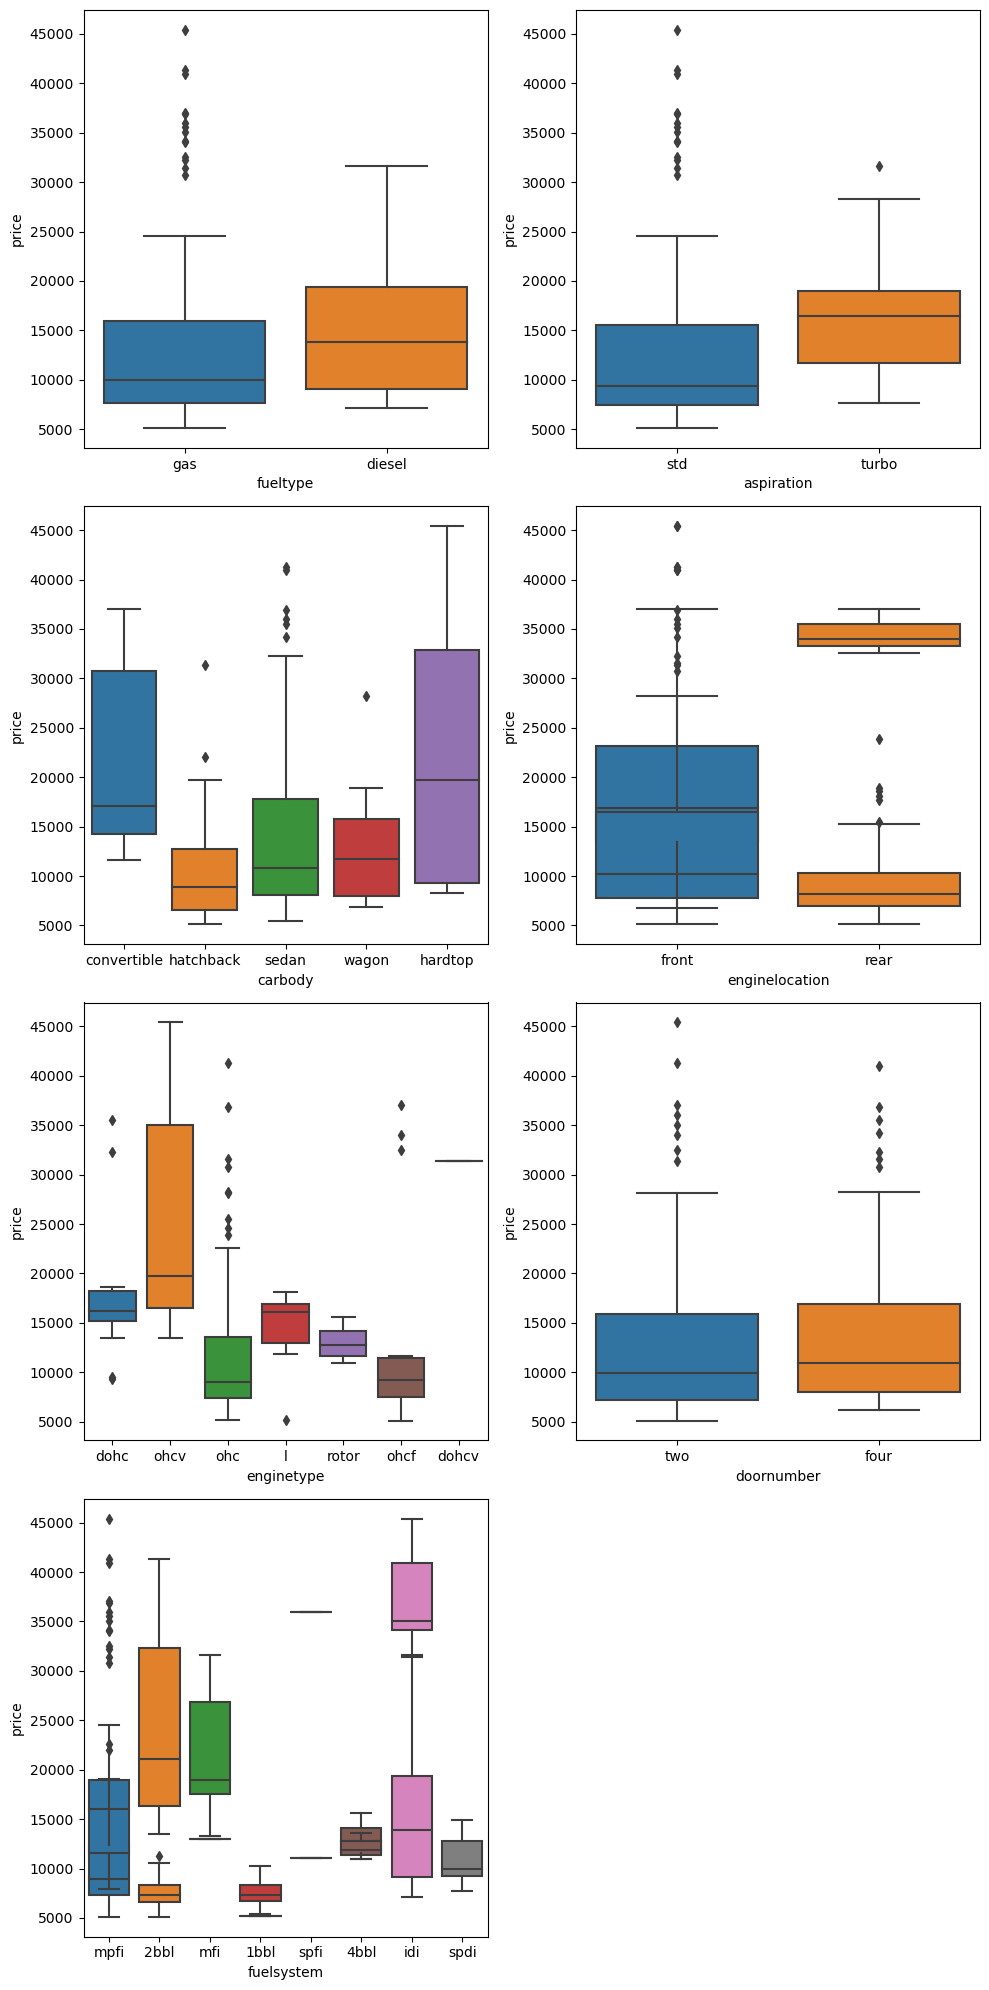

In [170]:
plt.figure(figsize=(10, 20))
plt.subplot(4,2,1)
sns.boxplot(x = 'fueltype', y = 'price', data = auto)
plt.subplot(4,2,2)
sns.boxplot(x = 'aspiration', y = 'price', data = auto)
plt.subplot(4,2,3)
sns.boxplot(x = 'carbody', y = 'price', data = auto)
plt.subplot(4,2,4)
sns.boxplot(x = 'drivewheel', y = 'price', data = auto)
plt.subplot(4,2,4)
sns.boxplot(x = 'enginelocation', y = 'price', data = auto)
plt.subplot(4,2,5)
sns.boxplot(x = 'enginetype', y = 'price', data = auto)
plt.subplot(4,2,6)
sns.boxplot(x = 'doornumber', y = 'price', data = auto)
plt.subplot(4,2,7)
sns.boxplot(x = 'cylindernumber', y = 'price', data = auto)
plt.subplot(4,2,7)
sns.boxplot(x = 'fuelsystem', y = 'price', data = auto)
plt.tight_layout()
plt.show()


## Conclusion:


- convertible, sedan and hardtop cars are costliers than others.
- hardtop cars are very less manufactured but their price is also higher.
- very few cars have engine at rear but if they have their price higher.
- ohc is the most type of engine used in cars and ohcv is used only in costly cars.
- mostly cars have 4 number of cylinder.
- if a car have higher number of cylinders then its price is also higher.
- mpfi and 2bbl are the most commonly fuel system used in cars.
- idi and spdi type of fuel system is used only in costly cars.

# Data Preparation

## Dummy Variables

In [171]:
#df.drop('CarName',axis=1,inplace=True)

In [172]:
#df

In [173]:
one_hot_encoded_data = pd.get_dummies(df, columns = ['enginetype', 'fueltype','cylindernumber','aspiration','doornumber','carbody','drivewheel','enginelocation','fuelsystem'])
print(one_hot_encoded_data)


     symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0            3       88.6      168.8      64.1       48.8        2548   
1            3       88.6      168.8      64.1       48.8        2548   
2            1       94.5      171.2      65.5       52.4        2823   
3            2       99.8      176.6      66.2       54.3        2337   
4            2       99.4      176.6      66.4       54.3        2824   
..         ...        ...        ...       ...        ...         ...   
200         -1      109.1      188.8      68.9       55.5        2952   
201         -1      109.1      188.8      68.8       55.5        3049   
202         -1      109.1      188.8      68.9       55.5        3012   
203         -1      109.1      188.8      68.9       55.5        3217   
204         -1      109.1      188.8      68.9       55.5        3062   

     enginesize  boreratio  stroke  compressionratio  ...  \
0           130       3.47    2.68               9.0  ...   
1

In [174]:
one_hot_encoded_data

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,enginelocation_front,enginelocation_rear,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,1,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,1,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,1,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,1,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,...,1,0,0,0,0,0,0,1,0,0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,...,1,0,0,0,0,0,0,1,0,0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,...,1,0,0,0,0,0,0,1,0,0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,...,1,0,0,0,0,1,0,0,0,0


# Model Building

## Splitting the Data into Training and Testing sets

In [175]:
p = "price"
x = one_hot_encoded_data.drop(["price"], axis=1)
y = one_hot_encoded_data[["price"]]

In [176]:
#y1 = one_hot_encoded_data.iloc[]

In [177]:
x

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,enginelocation_front,enginelocation_rear,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,1,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,1,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,1,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,1,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,...,1,0,0,0,0,0,0,1,0,0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,...,1,0,0,0,0,0,0,1,0,0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,...,1,0,0,0,0,0,0,1,0,0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,...,1,0,0,0,0,1,0,0,0,0


In [178]:
y

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0
...,...
200,16845.0
201,19045.0
202,21485.0
203,22470.0


In [179]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [180]:
x_train

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,enginelocation_front,enginelocation_rear,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
187,2,97.3,171.7,65.5,55.7,2319,97,3.01,3.40,23.0,...,1,0,0,0,0,1,0,0,0,0
37,0,96.5,167.5,65.2,53.3,2236,110,3.15,3.58,9.0,...,1,0,1,0,0,0,0,0,0,0
80,3,96.3,173.0,65.4,49.4,2370,110,3.17,3.46,7.5,...,1,0,0,0,0,0,0,0,1,0
79,1,93.0,157.3,63.8,50.8,2145,98,3.03,3.39,7.6,...,1,0,0,0,0,0,0,0,1,0
107,0,107.9,186.7,68.4,56.7,3020,120,3.46,3.19,8.4,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,0,96.5,175.4,65.2,54.1,2465,110,3.15,3.58,9.0,...,1,0,0,0,0,0,0,1,0,0
160,0,95.7,166.3,64.4,53.0,2094,98,3.19,3.03,9.0,...,1,0,0,1,0,0,0,0,0,0
69,0,106.7,187.5,70.3,54.9,3495,183,3.58,3.64,21.5,...,1,0,0,0,0,1,0,0,0,0
87,1,96.3,172.4,65.4,51.6,2403,110,3.17,3.46,7.5,...,1,0,0,0,0,0,0,0,1,0


In [181]:
 y_train

,price
187,9495.0
37,7895.0
80,9959.0
79,7689.0
107,11900.0
...,...
41,12945.0
160,7738.0
69,28176.0
87,9279.0


# Training the model

In [182]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Lasso
from sklearn import metrics

## Linear Regression

In [183]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [184]:
#x_train

In [185]:
y_predt= model.predict(x_test)

Mean_absolute_error = mean_absolute_error(y_test,y_predt)
print('Mean_absolute_error:',Mean_absolute_error)

Mean_squared_error = mean_squared_error(y_test,y_predt)
print('Mean_squared_error:',Mean_squared_error)

Root_Mean_squared_error = np.sqrt(Mean_squared_error)
print('Root_Mean_squared_error:',Root_Mean_squared_error)

RSquared = r2_score(y_test,y_predt)
print('R-Squared:',RSquared)

AdjRsquared = 1-((1-RSquared)*(len(x_test)-1)/(len(x_test)-len(x.columns)-1))
print('AdjRsquared:',AdjRsquared)

Mean_absolute_error: 2017.4482541104392
Mean_squared_error: 6597442.005335974
Root_Mean_squared_error: 2568.5486184489428
R-Squared: 0.8923270521329553
AdjRsquared: 1.3589098262234824


In [186]:
# Training data evaluation
y_pred=model.predict(x_train)

Mean_absolute_error = mean_absolute_error(y_train,y_pred)
print('Mean_absolute_error:',Mean_absolute_error)

Mean_squared_error = mean_squared_error(y_train,y_pred)
print('Mean_squared_error:',Mean_squared_error)

Root_Mean_squared_error = np.sqrt(Mean_squared_error)
print('Root_Mean_squared_error:',Root_Mean_squared_error)

RSquared = r2_score(y_train,y_pred)
print('R-Squared:',RSquared)

AdjRsquared = 1-((1-RSquared)*(len(x_train)-1)/(len(x_train)-len(x.columns)-1))
print('AdjRsquared:',AdjRsquared)

Mean_absolute_error: 1348.7831936843013
Mean_squared_error: 3454006.1205773572
Root_Mean_squared_error: 1858.4956606291437
R-Squared: 0.945949034301851
AdjRsquared: 0.9206278611819974


In [187]:
compare_model = pd.DataFrame({"LinearRegression": ["Mean_absolute_error","Mean_squared_error","Root_Mean_squared_error","R-Squared","AdjRsquared"],"value":[1378.7888,3346246.5956,1829.2748,0.9532,0.9312]})
compare_model

,LinearRegression,value
0,Mean_absolute_error,1.378789e+03
1,Mean_squared_error,3.346247e+06
2,Root_Mean_squared_error,1.829275e+03
3,R-Squared,9.532000e-01
4,AdjRsquared,9.312000e-01


Traceback (most recent call last):
  File (r"C:\Users\Akshata Potdar\Downloads\CarPrice_Assignment.csv.xls")
, line 1, in <module>  
  s = Something(y_predt)
  NameError: name 'y_predt' is not defined

In [188]:
y_predt

array([[20840.63710523],
       [ 7201.02397305],
       [16750.1215087 ],
       [16752.13067137],
       [43870.90506928],
       [38118.33834383],
       [12469.04854299],
       [10462.84314297],
       [13626.15964465],
       [33567.62129058],
       [18632.24056392],
       [21584.47536537],
       [ 9824.92036519],
       [10078.34078249],
       [13333.93865433],
       [ 6870.17138866],
       [16968.36549803],
       [10970.91609338],
       [ 7525.66154126],
       [10779.27925823],
       [17878.69499458],
       [ 9377.21965931],
       [ 8472.41984448],
       [13341.4920675 ],
       [ 6724.02175214],
       [10846.38614612],
       [12284.19947081],
       [17032.7400941 ],
       [13149.27046674],
       [13007.48353065],
       [ 6330.87366644],
       [19515.57115217],
       [10276.8134312 ],
       [16831.87834178],
       [ 9972.45445265],
       [16654.34880687],
       [ 7300.49070639],
       [17326.73298636],
       [ 7150.53372626],
       [19570.21261844],


In [189]:
y_test

,price
13,21105.0
45,8916.5
104,17199.0
101,13499.0
73,40960.0
49,36000.0
1,16500.0
183,7975.0
11,16925.0
47,32250.0


In [190]:
y_test - y_predt

,price
13,264.362895
45,1715.476027
104,448.878491
101,-3253.130671
73,-2910.905069
49,-2118.338344
1,4030.951457
183,-2487.843143
11,3298.840355
47,-1317.621291


### The Conclusion from Model Building


Therefore All of the model's are for this prediction since it has an accuracy_score approximately same as of 0.95.

In [191]:
predict = "price"
df = df[["symboling", "wheelbase", "carlength", "carwidth", "carheight", "curbweight","enginesize", "boreratio", "stroke","compressionratio", "horsepower", "peakrpm", "citympg", "highwaympg", "price"]]
x = np.array(df.drop([predict], 1))
y = np.array(df[predict])

In [192]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)
  

In [193]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)
predictions = model.predict(xtest)

In [194]:
from sklearn.metrics import mean_absolute_error
model.score(xtest, predictions)

1.0